# Tech Challenge 4: Machine Learning para Diagnóstico de Obesidade

### **Importando as Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando as bibliotecas de Machine Learning

from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Instala e importa a biblioteca catboost
!pip install catboost
from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


### **Carregando o dataset**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Obesidade_pos/Obesity.csv')

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [7]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


* As colunas FCVC, NCP, CH2O, FAF e TUE possuem valores com casas decimais para representar as gradações de frequência de hábitos.
* É preciso arredondar os seus valores para o número inteiro mais próximo.

In [10]:
cols = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

df[cols] = df[cols].round().astype('Int64')

df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


### **Traduções**

In [11]:
# Dicionário de renomeação
colunas_traduzidas = {
    'Gender': 'Genero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history': 'Historico_Familiar_Sobrepeso',
    'FAVC': 'Consumo_Alimentos_Caloricos',
    'FCVC': 'Frequencia_Consumo_Vegetais',
    'NCP': 'Numero_Refeicoes_Principais',
    'CAEC': 'Consumo_Alimentos_Entre_Refeicoes',
    'SMOKE': 'Fumante',
    'CH2O': 'Consumo_Agua_Litros',
    'SCC': 'Monitoramento_Calorias',
    'FAF': 'Frequencia_Atividade_Fisica',
    'TUE': 'Tempo_Uso_Dispositivos_Tecnologicos',
    'CALC': 'Consumo_Alcool',
    'MTRANS': 'Meio_Transporte',
    'Obesity': 'Nivel_obesidade'
}


df = df.rename(columns=colunas_traduzidas)

In [12]:
# Gênero

genero_translation= {
    'Male': 'Masculino',
    'Female': 'Feminino'
}

if 'Genero' in df.columns:
    df['Genero'] = df['Genero'].replace(genero_translation)

df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [13]:
# Dicionário para tradução
translation_map = {
    'Normal_Weight': 'Peso Normal',
    'Overweight_Level_I': 'Sobrepeso I',
    'Overweight_Level_II': 'Sobrepeso II',
    'Obesity_Type_I': 'Obesidade I',
    'Obesity_Type_II': 'Obesidade II',
    'Obesity_Type_III': 'Obesidade III',
    'Insufficient_Weight': 'Abaixo do peso'
}

# Aplicar a tradução
df['Nivel_obesidade'] = df['Nivel_obesidade'].replace(translation_map)

df['Nivel_obesidade'].unique()

array(['Peso Normal', 'Sobrepeso I', 'Sobrepeso II', 'Obesidade I',
       'Abaixo do peso', 'Obesidade II', 'Obesidade III'], dtype=object)

In [14]:
# Meios de transporte
transport_translation = {
    'Public_Transportation': 'Transporte Público',
    'Automobile': 'Carro',
    'Walking': 'A pé',
    'Motorbike': 'Moto',
    'Bike': 'Bicicleta'
}
if 'Meio_Transporte' in df.columns:
    df['Meio_Transporte'] = df['Meio_Transporte'].replace(transport_translation)

In [15]:
# Binários yes/no (família, FAVC, SCC, tabagismo)
yes_no_pt = {'yes': 'Sim', 'no': 'Não'}
for col in ['Historico_Familiar_Sobrepeso', 'Consumo_Alimentos_Caloricos',
            'Monitoramento_Calorias', 'Fumante']:
    if col in df.columns:
        df[col] = df[col].replace(yes_no_pt)

In [16]:
# Frequências textuais comuns (CAEC e CALC)
freq_pt = {'no': 'Não', 'Sometimes': 'Às vezes', 'Frequently': 'Frequentemente', 'Always': 'Sempre'}
for col in ['Consumo_Alimentos_Entre_Refeicoes', 'Consumo_Alcool']:
    if col in df.columns:
        df[col] = df[col].replace(freq_pt)

In [17]:
df.head()

,Genero,Idade,Altura,Peso,Historico_Familiar_Sobrepeso,Consumo_Alimentos_Caloricos,Frequencia_Consumo_Vegetais,Numero_Refeicoes_Principais,Consumo_Alimentos_Entre_Refeicoes,Fumante,Consumo_Agua_Litros,Monitoramento_Calorias,Frequencia_Atividade_Fisica,Tempo_Uso_Dispositivos_Tecnologicos,Consumo_Alcool,Meio_Transporte,Nivel_obesidade
0,Feminino,21.0,1.62,64.0,Sim,Não,2,3,Às vezes,Não,2,Não,0,1,Não,Transporte Público,Peso Normal
1,Feminino,21.0,1.52,56.0,Sim,Não,3,3,Às vezes,Sim,3,Sim,3,0,Às vezes,Transporte Público,Peso Normal
2,Masculino,23.0,1.80,77.0,Sim,Não,2,3,Às vezes,Não,2,Não,2,1,Frequentemente,Transporte Público,Peso Normal
3,Masculino,27.0,1.80,87.0,Não,Não,3,3,Às vezes,Não,2,Não,2,0,Frequentemente,A pé,Sobrepeso I
4,Masculino,22.0,1.78,89.8,Não,Não,2,1,Às vezes,Não,2,Não,0,0,Às vezes,Transporte Público,Sobrepeso II


In [18]:
df.to_excel('arquivo_obesidade_tratado.xlsx', index=False)


### **Gráficos da Análise Descritiva do DF**

In [19]:
# Configurações de estilo para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

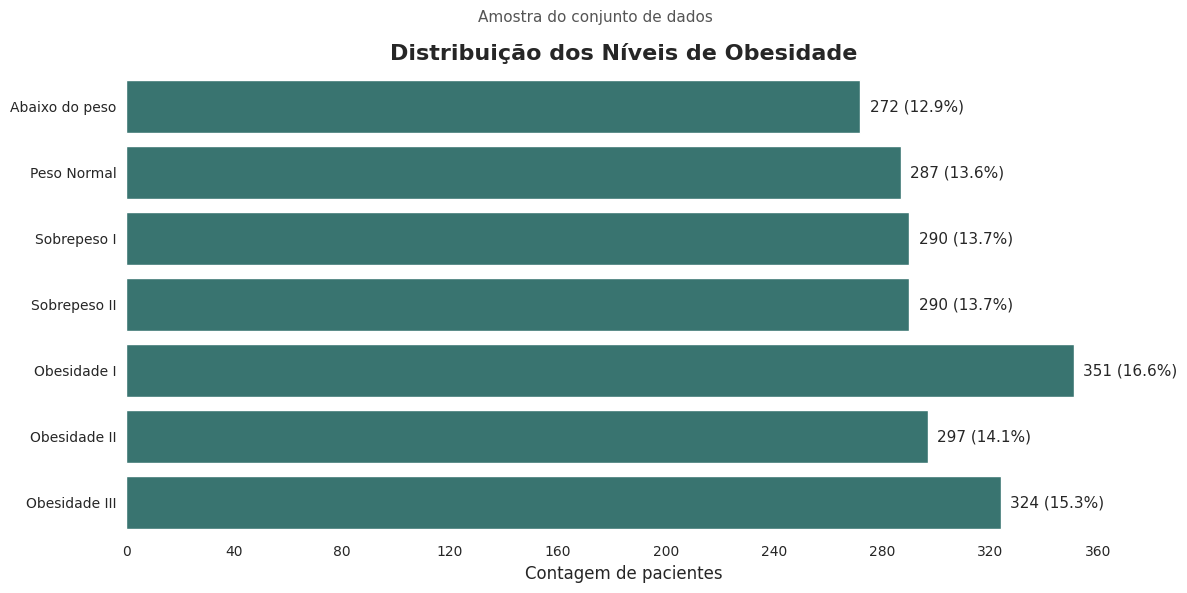

In [20]:
ordem = [c for c in ['Abaixo do peso','Peso Normal','Sobrepeso I','Sobrepeso II',
                     'Obesidade I','Obesidade II','Obesidade III']
         if c in df['Nivel_obesidade'].unique()]

counts = df['Nivel_obesidade'].value_counts().reindex(ordem)
total = len(df)

fig, ax = plt.subplots()

sns.countplot(
    y='Nivel_obesidade',
    data=df,
    order=ordem,
    color='#2F7E79',
    ax=ax
)

ax.set_title("Distribuição dos Níveis de Obesidade",
             fontweight="bold", pad=10)
fig.suptitle("Amostra do conjunto de dados",
             y=0.98, fontsize=11, color="#555555")
ax.set_xlabel("Contagem de pacientes")
ax.set_ylabel("")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(False)
sns.despine(ax=ax, left=True, bottom=True)

for y, c in enumerate(counts.fillna(0).astype(int).values):
    pct = 100 * c / total if total else 0
    ax.text(c + max(counts)*0.01, y, f"{c} ({pct:.1f}%)",
            va="center", fontsize=11)

fig.tight_layout()
fig.savefig("1_distribuicao_obesidade.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

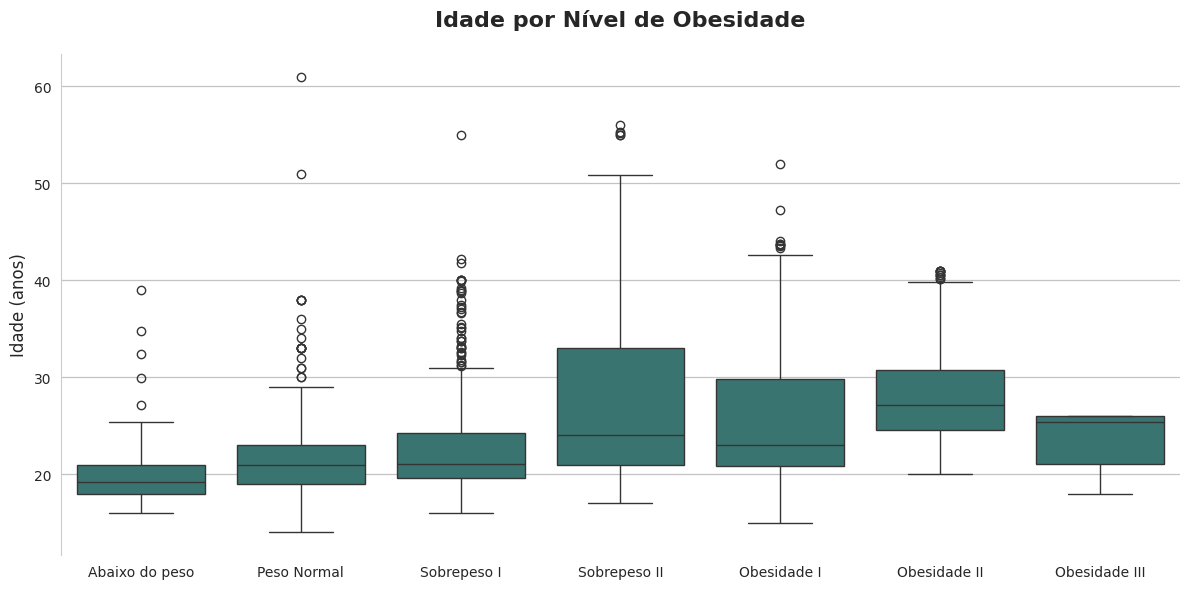

In [21]:
fig, ax = plt.subplots()

sns.boxplot(
    x='Nivel_obesidade',
    y='Idade',
    data=df,
    order=ordem if ordem else None,
    color='#2F7E79',
    showfliers=True,
    ax=ax
)

ax.set_title(
    'Idade por Nível de Obesidade',
    fontweight='bold',
    pad=20
)

ax.set_xlabel('')
ax.set_ylabel('Idade (anos)')
ax.tick_params(axis='x', rotation=0)


ax.grid(
    axis='y',
    linestyle='-',
    linewidth=0.9,
    alpha=0.5,
    color='#888888'
)

# desliga grade no eixo X
ax.grid(False, axis='x')

sns.despine(ax=ax, left=False, bottom=True)

fig.tight_layout()
fig.savefig('2_idade_vs_obesidade.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


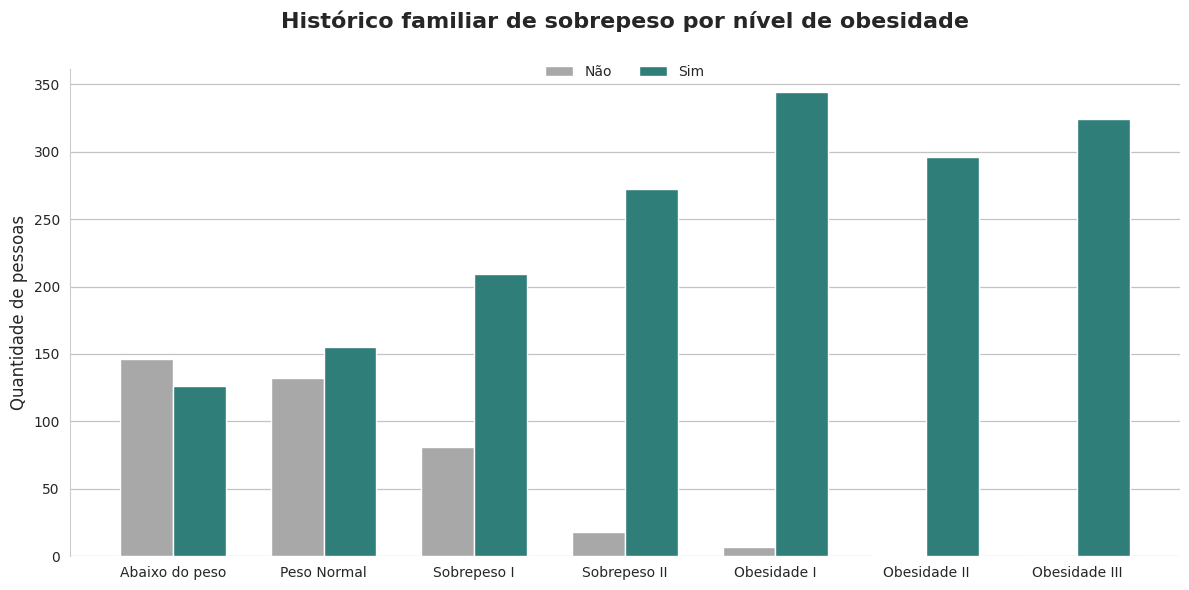

In [22]:
ordem_obesidade = ordem

ordem_hist = ['Não', 'Sim']
ordem_hist = [
    c for c in ordem_hist
    if 'Historico_Familiar_Sobrepeso' in df.columns
    and c in df['Historico_Familiar_Sobrepeso'].unique()
]

tab = (
    pd.crosstab(df['Nivel_obesidade'], df['Historico_Familiar_Sobrepeso'])
      .reindex(index=ordem_obesidade, columns=ordem_hist)
      .fillna(0)
)

fig, ax = plt.subplots()

x = np.arange(len(tab.index))
width = 0.35

colors = {
    'Sim': '#2F7E79',
    'Não': '#A8A8A8'
}

for j, hist in enumerate(tab.columns):
    ax.bar(
        x + (j - 0.5) * width,
        tab[hist].values,
        width=width,
        label=hist,
        color=colors[hist]
    )


ax.set_xticks(x)
ax.set_xticklabels(tab.index)

ax.set_xlabel('')
ax.set_ylabel('Quantidade de pessoas')
ax.set_title(
    'Histórico familiar de sobrepeso por nível de obesidade',
    fontweight='bold',
    pad=30
)


ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    frameon=False,
    borderaxespad=0
)


ax.grid(axis='y', linestyle='-', linewidth=0.9, alpha=0.5, color='#888888')
ax.grid(False, axis='x')
sns.despine(ax=ax, left=False, bottom=True)


plt.subplots_adjust(top=0.85)

fig.tight_layout()
fig.savefig('3b_hist_familiar_barras_lado_a_lado.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


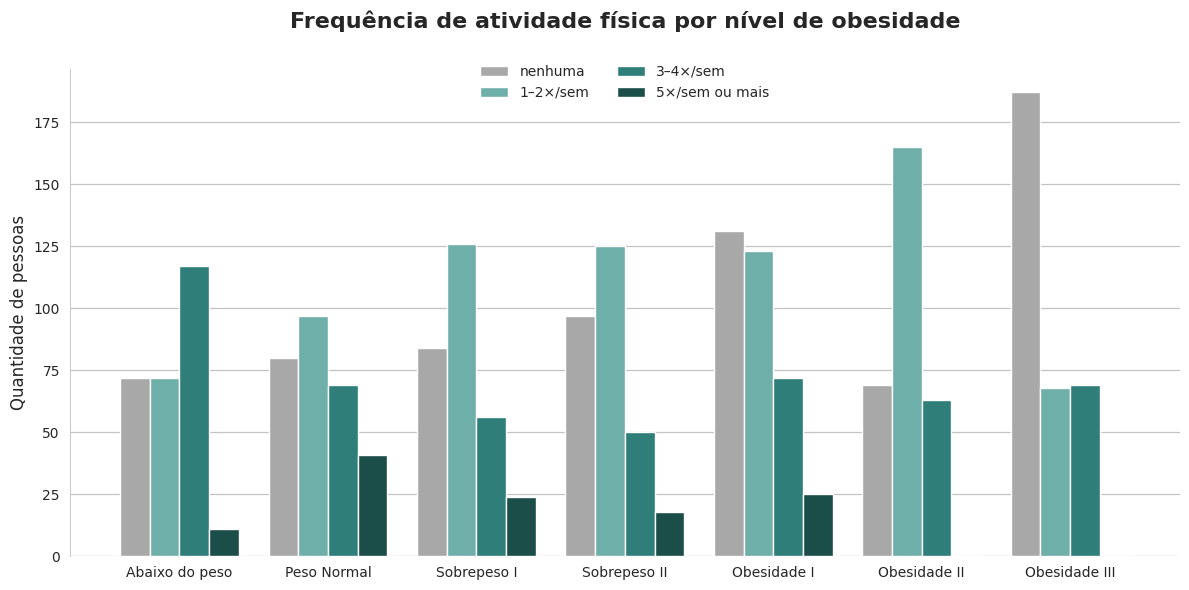

In [23]:
fa = pd.Series(df['Frequencia_Atividade_Fisica']).round().clip(0, 3)
map_faf = {
    0.0: 'nenhuma',
    1.0: '1–2×/sem',
    2.0: '3–4×/sem',
    3.0: '5×/sem ou mais'
}
df['FAF_category'] = fa.map(map_faf).astype('category')


ordem_faf = ['nenhuma', '1–2×/sem', '3–4×/sem', '5×/sem ou mais']
ordem_faf = [c for c in ordem_faf if c in df['FAF_category'].cat.categories]


ordem_obesidade = ordem


tab = (
    pd.crosstab(df['Nivel_obesidade'], df['FAF_category'])
      .reindex(index=ordem_obesidade, columns=ordem_faf)
      .fillna(0)
)


fig, ax = plt.subplots()

x = np.arange(len(tab.index))
n_groups = len(tab.columns)
width = 0.8 / n_groups


base_palette = ['#A8A8A8', '#6FAFA9', '#2F7E79', '#1B4D49']
colors = base_palette[:n_groups]


for j, (faf, color) in enumerate(zip(tab.columns, colors)):
    ax.bar(
        x + (j - (n_groups - 1) / 2) * width,
        tab[faf].values,
        width=width,
        label=faf,
        color=color
    )

ax.set_xticks(x)
ax.set_xticklabels(tab.index)

ax.set_xlabel('')
ax.set_ylabel('Quantidade de pessoas')
ax.set_title(
    'Frequência de atividade física por nível de obesidade',
    fontweight='bold',
    pad=30
)


ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    frameon=False,
    borderaxespad=0
)


ax.grid(axis='y', linestyle='-', linewidth=0.9, alpha=0.5, color='#888888')
ax.grid(False, axis='x')
sns.despine(ax=ax, left=False, bottom=True)


plt.subplots_adjust(top=0.85)

fig.tight_layout()
fig.savefig('4_atividade_fisica_vs_obesidade_barras_verde.png',
            dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


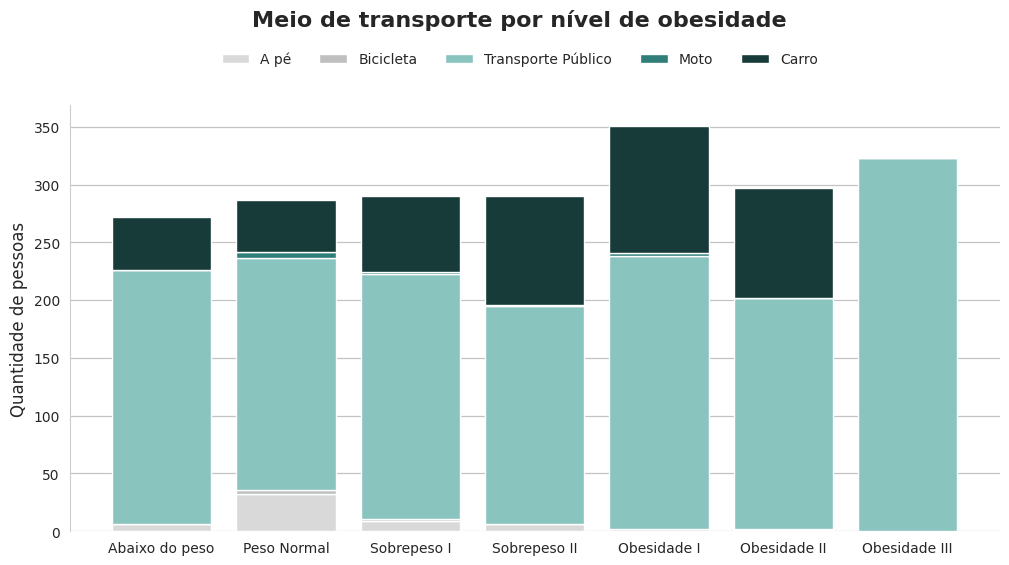

In [31]:
ordem_trans = [
    c for c in ['A pé', 'Bicicleta', 'Transporte Público', 'Moto', 'Carro']
    if 'Meio_Transporte' in df.columns and c in df['Meio_Transporte'].unique()
]

ordem_obesidade = ordem


tab = (
    pd.crosstab(df['Nivel_obesidade'], df['Meio_Transporte'])
      .reindex(index=ordem_obesidade, columns=ordem_trans)
      .fillna(0)
)


fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(tab.index))

color_map = {
    'A pé': '#D9D9D9',
    'Bicicleta': '#BFBFBF',
    'Transporte Público': '#8AC4BF',
    'Moto': '#2F7E79',
    'Carro': '#163B38'
}

bottom = np.zeros(len(tab))

for meio in tab.columns:
    ax.bar(
        x,
        tab[meio].values,
        bottom=bottom,
        label=meio,
        color=color_map.get(meio, '#999999')
    )
    bottom += tab[meio].values


ax.set_xticks(x)
ax.set_xticklabels(tab.index)
ax.set_xlabel('')
ax.set_ylabel('Quantidade de pessoas')


ax.set_title("")


fig.suptitle(
    "Meio de transporte por nível de obesidade",
    fontweight="bold",
    fontsize=16,
    y=0.98
)

handles, labels = ax.get_legend_handles_labels()

fig.legend(
    handles, labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.93),
    ncol=5,
    frameon=False
)


ax.grid(axis='y', linestyle='-', linewidth=0.9, alpha=0.5, color='#888888')
ax.grid(False, axis='x')
sns.despine(ax=ax, left=False, bottom=True)


fig.subplots_adjust(top=0.82)

fig.savefig(
    '5_transporte_vs_obesidade_empilhado_verde_cinza.png',
    dpi=300,
    bbox_inches='tight'
)

plt.show()
plt.close(fig)


### **Modelagem Preditiva: Treinamento e Avaliação dos Modelos**


In [32]:
df.head()

,Genero,Idade,Altura,Peso,Historico_Familiar_Sobrepeso,Consumo_Alimentos_Caloricos,Frequencia_Consumo_Vegetais,Numero_Refeicoes_Principais,Consumo_Alimentos_Entre_Refeicoes,Fumante,Consumo_Agua_Litros,Monitoramento_Calorias,Frequencia_Atividade_Fisica,Tempo_Uso_Dispositivos_Tecnologicos,Consumo_Alcool,Meio_Transporte,Nivel_obesidade,FAF_category
0,Feminino,21.0,1.62,64.0,Sim,Não,2,3,Às vezes,Não,2,Não,0,1,Não,Transporte Público,Peso Normal,nenhuma
1,Feminino,21.0,1.52,56.0,Sim,Não,3,3,Às vezes,Sim,3,Sim,3,0,Às vezes,Transporte Público,Peso Normal,5×/sem ou mais
2,Masculino,23.0,1.80,77.0,Sim,Não,2,3,Às vezes,Não,2,Não,2,1,Frequentemente,Transporte Público,Peso Normal,3–4×/sem
3,Masculino,27.0,1.80,87.0,Não,Não,3,3,Às vezes,Não,2,Não,2,0,Frequentemente,A pé,Sobrepeso I,3–4×/sem
4,Masculino,22.0,1.78,89.8,Não,Não,2,1,Às vezes,Não,2,Não,0,0,Às vezes,Transporte Público,Sobrepeso II,nenhuma


### Criando o modelo de Machine Learning

In [33]:
# Remover a coluna categórica criada para visualização e reverter traduções para o modelo
if 'FAF_category' in df.columns:
    df = df.drop(columns=['FAF_category'])

# Separação de Features (X) e Target (y)
TARGET = 'Nivel_obesidade'


num_esperadas = [
    'Idade','Altura','Peso',
    'Frequencia_Consumo_Vegetais','Numero_Refeicoes_Principais',
    'Consumo_Agua_Litros','Frequencia_Atividade_Fisica',
    'Tempo_Uso_Dispositivos_Tecnologicos'
]
for col in num_esperadas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


X = df.drop(columns=[TARGET])
y = df[TARGET]

In [34]:
# aplica LabelEncoder no y
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [35]:
# Criação do Pipeline de Pré-processamento
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ],
    remainder='drop'
)

In [36]:
# Divisão em Dados de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Definição dos Modelos
models = {
    'Regressao Logistica': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss',
        enable_categorical=False
    ),
    'CatBoost': CatBoostClassifier(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=False,
        allow_writing_files=False
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=-1,
        force_col_wise=True
    )
}

In [38]:
# Loop para Treinar, Avaliar e Salvar cada Modelo

# Dicionário para armazenar os pipelines treinados
trained_pipelines = {}

for name, model_instance in models.items():
    # Criação do Pipeline Completo (Pré-processamento + Modelo)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model_instance)])

    # Treinar o modelo
    print(f"--- Treinando o modelo: {name} ---")
    pipeline.fit(X_train, y_train)

    # Avaliação do Modelo
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

    # Relatório de Classificação Detalhado
    print("\n--- Relatório de Classificação ---")
    print(classification_report(y_test, y_pred))

    # Salvar o modelo treinado
    model_filename = f"{name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(pipeline, model_filename)
    print(f"Modelo salvo como '{model_filename}'")
    print("="*50 + "\n")

    # Salvar o pipeline em memória
    trained_pipelines[name] = pipeline

--- Treinando o modelo: Regressao Logistica ---
Acurácia no conjunto de teste: 88.42%

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        54
           1       0.89      0.97      0.93        70
           2       0.98      0.93      0.96        60
           3       0.98      1.00      0.99        65
           4       0.85      0.69      0.76        58
           5       0.72      0.76      0.74        58
           6       0.85      0.81      0.83        58

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.88      0.88      0.88       423

Modelo salvo como 'regressao_logistica_model.pkl'

--- Treinando o modelo: Random Forest ---
Acurácia no conjunto de teste: 91.96%

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
     

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia no conjunto de teste: 96.22%

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.97      0.96      0.96        70
           2       0.98      1.00      0.99        60
           3       1.00      0.98      0.99        65
           4       0.92      0.95      0.93        58
           5       0.90      0.95      0.92        58
           6       0.96      0.95      0.96        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

Modelo salvo como 'xgboost_model.pkl'

--- Treinando o modelo: CatBoost ---
Acurácia no conjunto de teste: 94.80%

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.97      0.99      0.98        70
           2    

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [39]:
# Verificação de Overfitting
for name, pipeline in trained_pipelines.items():

    # Avaliar no TREINO
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Avaliar no TESTE
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"\n--- {name} ---")
    print(f"Acurácia no TREINO: {train_accuracy * 100:.2f}%")
    print(f"Acurácia no TESTE: {test_accuracy * 100:.2f}%")
    print(f"Diferença: {(train_accuracy - test_accuracy) * 100:.2f}%")

    if (train_accuracy - test_accuracy) > 0.05:
        print("⚠️ POSSÍVEL OVERFITTING!")
    else:
        print("✅ Modelo generaliza bem")


--- Regressao Logistica ---
Acurácia no TREINO: 89.99%
Acurácia no TESTE: 88.42%
Diferença: 1.57%
✅ Modelo generaliza bem

--- Random Forest ---
Acurácia no TREINO: 100.00%
Acurácia no TESTE: 91.96%
Diferença: 8.04%
⚠️ POSSÍVEL OVERFITTING!

--- SVM ---
Acurácia no TREINO: 95.85%
Acurácia no TESTE: 91.02%
Diferença: 4.84%
✅ Modelo generaliza bem

--- XGBoost ---
Acurácia no TREINO: 100.00%
Acurácia no TESTE: 96.22%
Diferença: 3.78%
✅ Modelo generaliza bem

--- CatBoost ---
Acurácia no TREINO: 98.40%
Acurácia no TESTE: 94.80%
Diferença: 3.60%
✅ Modelo generaliza bem

--- LightGBM ---
Acurácia no TREINO: 100.00%
Acurácia no TESTE: 97.64%
Diferença: 2.36%
✅ Modelo generaliza bem


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [40]:
# Verificação de Overfitting: Cross-Validation

from sklearn.model_selection import cross_val_score

for name, model_instance in models.items():
    # Criar um pipeline novo (não treinado) para o CV
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model_instance)])

    # Avaliar com 5-fold cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    # Pegar a acurácia no teste do pipeline já treinado
    test_accuracy = accuracy_score(y_test, trained_pipelines[name].predict(X_test))

    print(f"\n--- {name} ---")
    print(f"Acurácia média (CV): {cv_scores.mean() * 100:.2f}%")
    print(f"Desvio padrão (CV): {cv_scores.std() * 100:.2f}%")
    print(f"Acurácia no teste: {test_accuracy * 100:.2f}%")

    # Se a média do CV está próxima do teste, o modelo generaliza bem
    if abs(cv_scores.mean() - test_accuracy) < 0.05:
        print("✅ Modelo generaliza bem")
    else:
        print("⚠️ Diferença entre CV e teste - verificar melhor")

    # Se o desvio padrão é alto, o modelo é instável
    if cv_scores.std() > 0.05:
        print("⚠️ Modelo instável (alto desvio padrão)")
    else:
        print("✅ Modelo estável")


--- Regressao Logistica ---
Acurácia média (CV): 86.49%
Desvio padrão (CV): 1.59%
Acurácia no teste: 88.42%
✅ Modelo generaliza bem
✅ Modelo estável

--- Random Forest ---
Acurácia média (CV): 92.89%
Desvio padrão (CV): 1.32%
Acurácia no teste: 91.96%
✅ Modelo generaliza bem
✅ Modelo estável

--- SVM ---
Acurácia média (CV): 90.40%
Desvio padrão (CV): 1.20%
Acurácia no teste: 91.02%
✅ Modelo generaliza bem
✅ Modelo estável


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:36:25] WARNING: /w


--- XGBoost ---
Acurácia média (CV): 96.27%
Desvio padrão (CV): 1.27%
Acurácia no teste: 96.22%
✅ Modelo generaliza bem
✅ Modelo estável

--- CatBoost ---
Acurácia média (CV): 95.14%
Desvio padrão (CV): 0.69%
Acurácia no teste: 94.80%
✅ Modelo generaliza bem
✅ Modelo estável


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM ---
Acurácia média (CV): 97.33%
Desvio padrão (CV): 0.84%
Acurácia no teste: 97.64%
✅ Modelo generaliza bem
✅ Modelo estável


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Curva de Aprendizado: Regressao Logistica ---


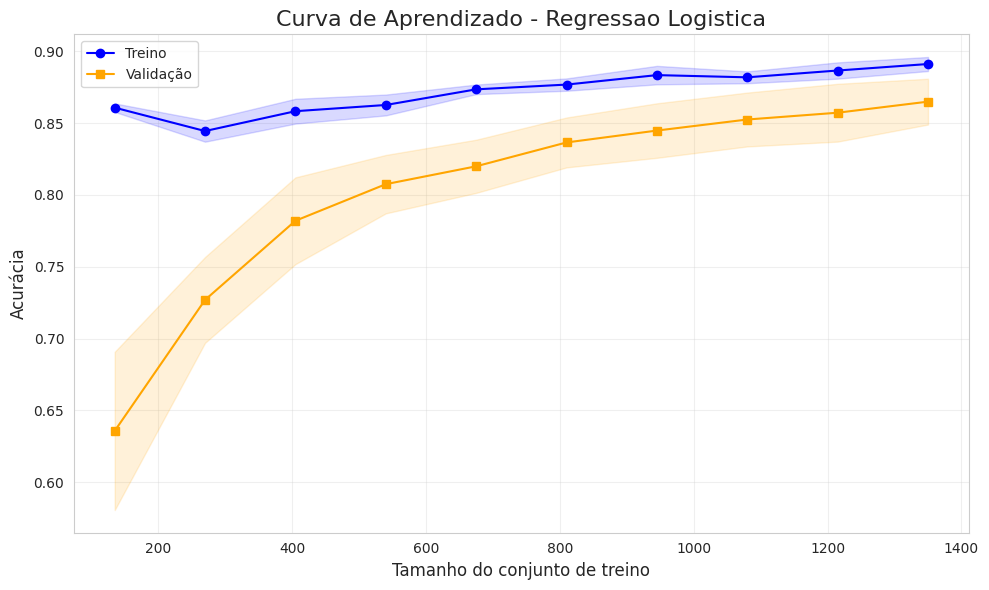

Acurácia final no treino: 0.89
Acurácia final na validação: 0.86
Gap (diferença): 0.03
✅ As curvas convergem - NÃO há overfitting

--- Curva de Aprendizado: Random Forest ---


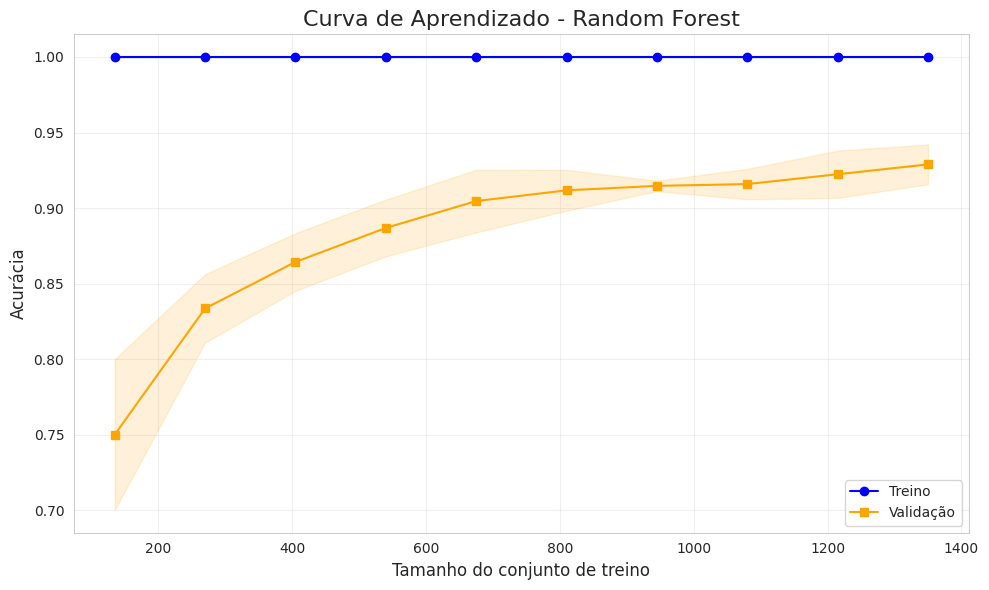

Acurácia final no treino: 1.00
Acurácia final na validação: 0.93
Gap (diferença): 0.07
⚠️ Gap moderado - Possível leve overfitting

--- Curva de Aprendizado: SVM ---


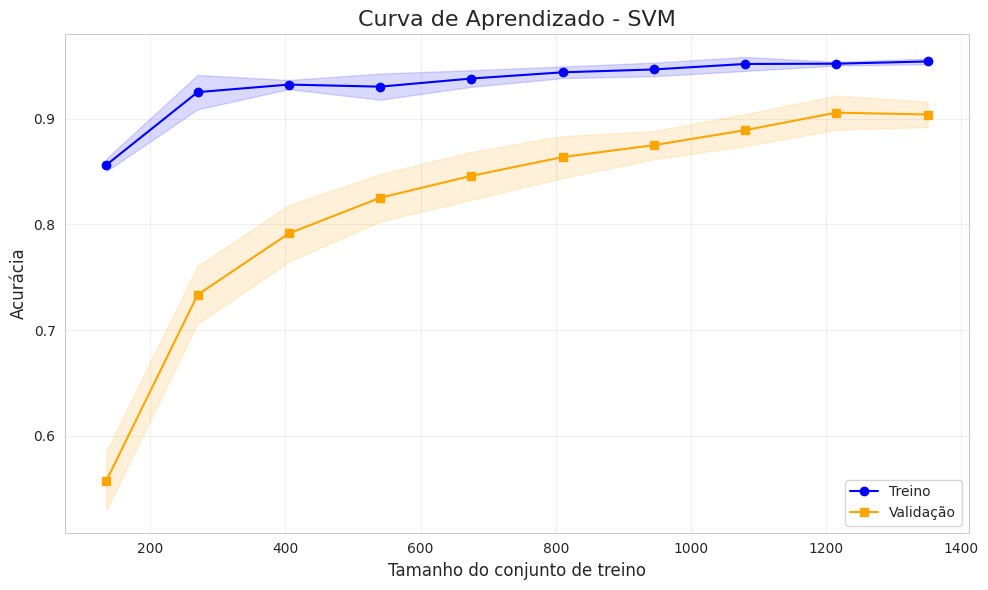

Acurácia final no treino: 0.95
Acurácia final na validação: 0.90
Gap (diferença): 0.05
⚠️ Gap moderado - Possível leve overfitting

--- Curva de Aprendizado: XGBoost ---


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

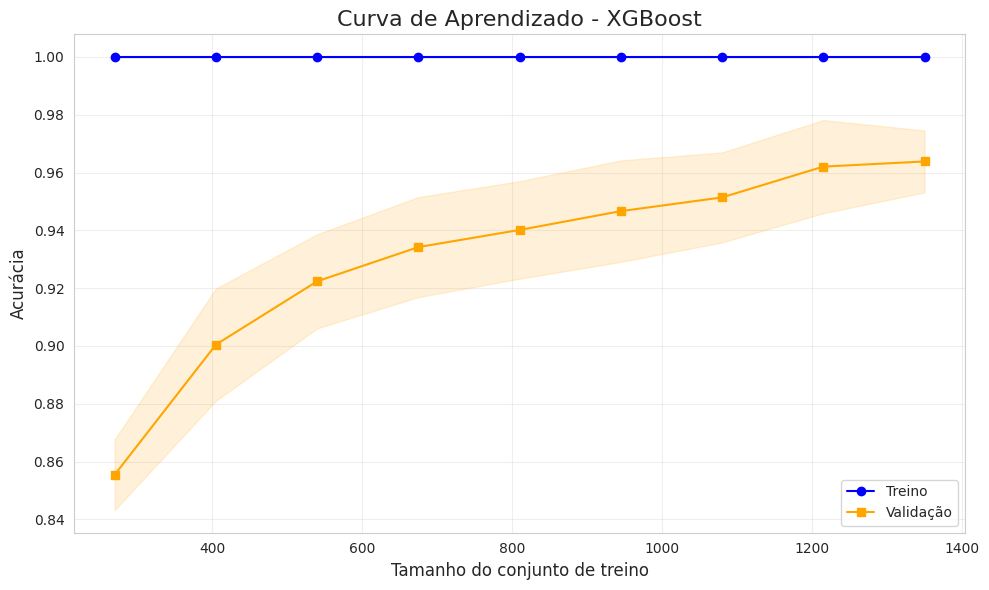

Acurácia final no treino: 1.00
Acurácia final na validação: 0.96
Gap (diferença): 0.04
✅ As curvas convergem - NÃO há overfitting

--- Curva de Aprendizado: CatBoost ---


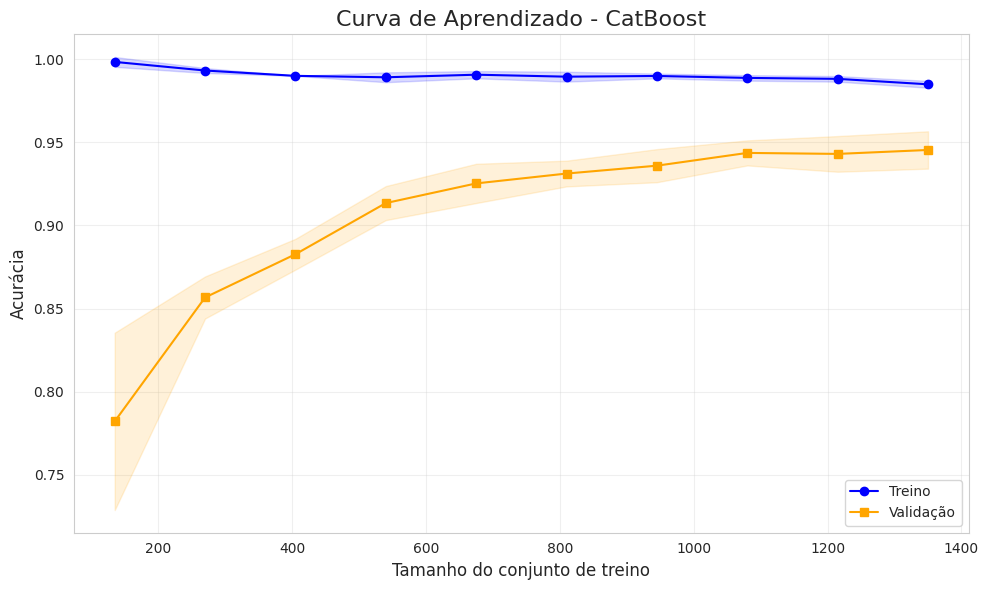

Acurácia final no treino: 0.99
Acurácia final na validação: 0.95
Gap (diferença): 0.04
✅ As curvas convergem - NÃO há overfitting

--- Curva de Aprendizado: LightGBM ---


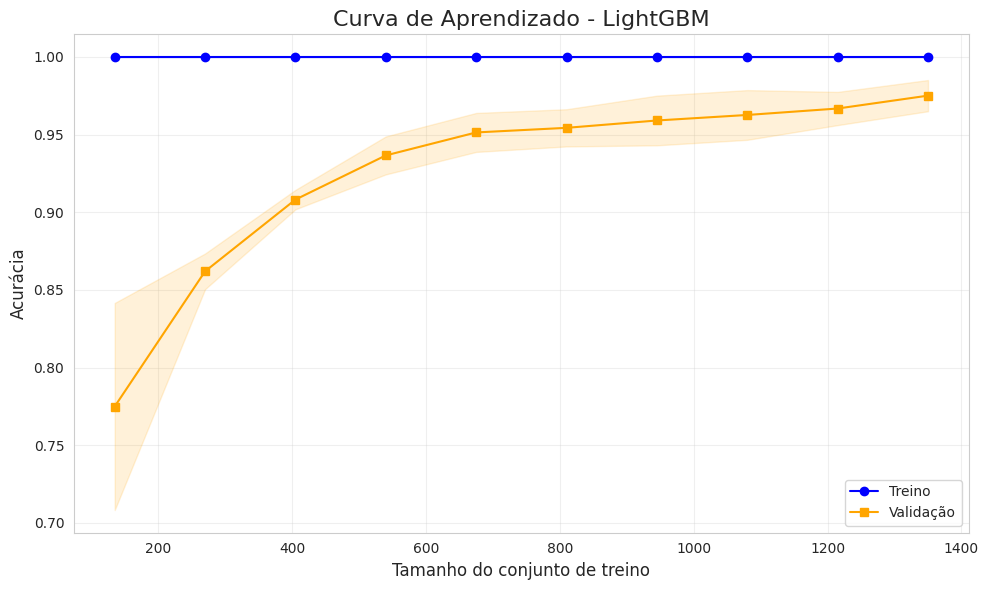

Acurácia final no treino: 1.00
Acurácia final na validação: 0.98
Gap (diferença): 0.02
✅ As curvas convergem - NÃO há overfitting


In [41]:
# Verificação de Overfitting: Curvas de Aprendizado

from sklearn.model_selection import learning_curve

for name, pipeline in trained_pipelines.items():
    print(f"\n--- Curva de Aprendizado: {name} ---")

    # Gerar as curvas de aprendizado
    train_sizes, train_scores, val_scores = learning_curve(
        pipeline, X_train, y_train,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        n_jobs=-1  # Usar todos os processadores disponíveis
    )

    # Calcular médias e desvios padrão
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    # Criar o gráfico
    plt.figure(figsize=(10, 6))

    # Plotar as curvas com áreas de desvio padrão
    plt.plot(train_sizes, train_mean, label='Treino', marker='o', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, val_mean, label='Validação', marker='s', color='orange')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                     alpha=0.15, color='orange')

    plt.xlabel('Tamanho do conjunto de treino')
    plt.ylabel('Acurácia')
    plt.title(f'Curva de Aprendizado - {name}')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Análise automática
    gap = train_mean[-1] - val_mean[-1]  # Diferença no final da curva

    print(f"Acurácia final no treino: {train_mean[-1]:.2f}")
    print(f"Acurácia final na validação: {val_mean[-1]:.2f}")
    print(f"Gap (diferença): {gap:.2f}")

    if gap < 0.05:
        print("✅ As curvas convergem - NÃO há overfitting")
    elif gap < 0.10:
        print("⚠️ Gap moderado - Possível leve overfitting")
    else:
        print("🚨 Gap grande - Overfitting significativo!")

    print("="*60)

In [42]:
try:
    classes_mapping = dict(enumerate(le_y.classes_))
    print("Mapeamento das classes de Nivel_obesidade:")
    for codigo, nome in classes_mapping.items():
        print(f"{codigo}: {nome}")
except:
    print("LabelEncoder não encontrado na memória")

Mapeamento das classes de Nivel_obesidade:
0: Abaixo do peso
1: Obesidade I
2: Obesidade II
3: Obesidade III
4: Peso Normal
5: Sobrepeso I
6: Sobrepeso II



--- Matriz de Confusão: Regressao Logistica ---


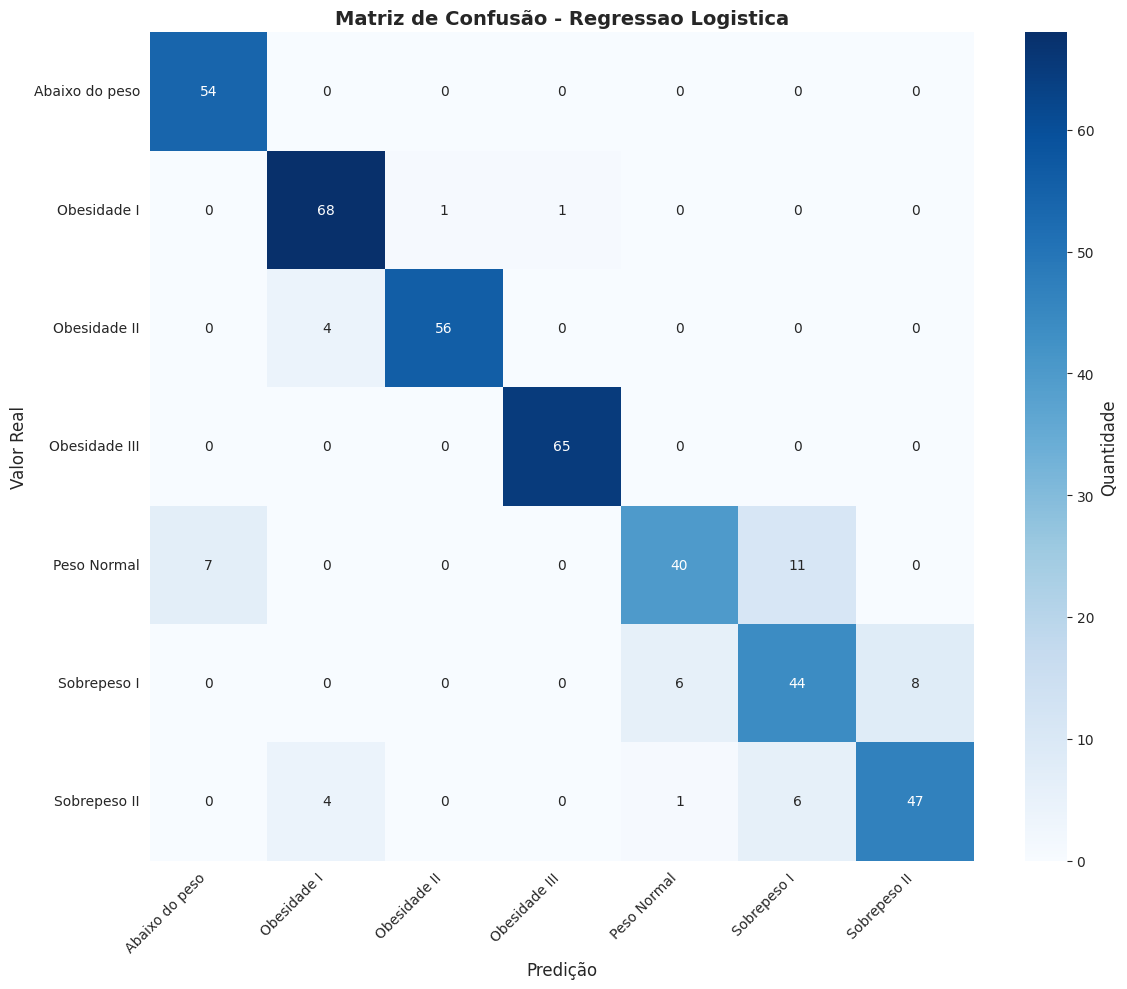


Análise por classe:
Abaixo do peso: 54/54 corretos (100.0%)
Obesidade I: 68/70 corretos (97.1%)
Obesidade II: 56/60 corretos (93.3%)
Obesidade III: 65/65 corretos (100.0%)
Peso Normal: 40/58 corretos (69.0%)
 ⚠️  Peso Normal tem desempenho ruim - possível overfitting ou pouca amostra nessa classe
Sobrepeso I: 44/58 corretos (75.9%)
Sobrepeso II: 47/58 corretos (81.0%)

⚠️ Alto desvio padrão entre classes (0.12) - desempenho inconsistente
------------------------------------------------------------

--- Matriz de Confusão: Random Forest ---


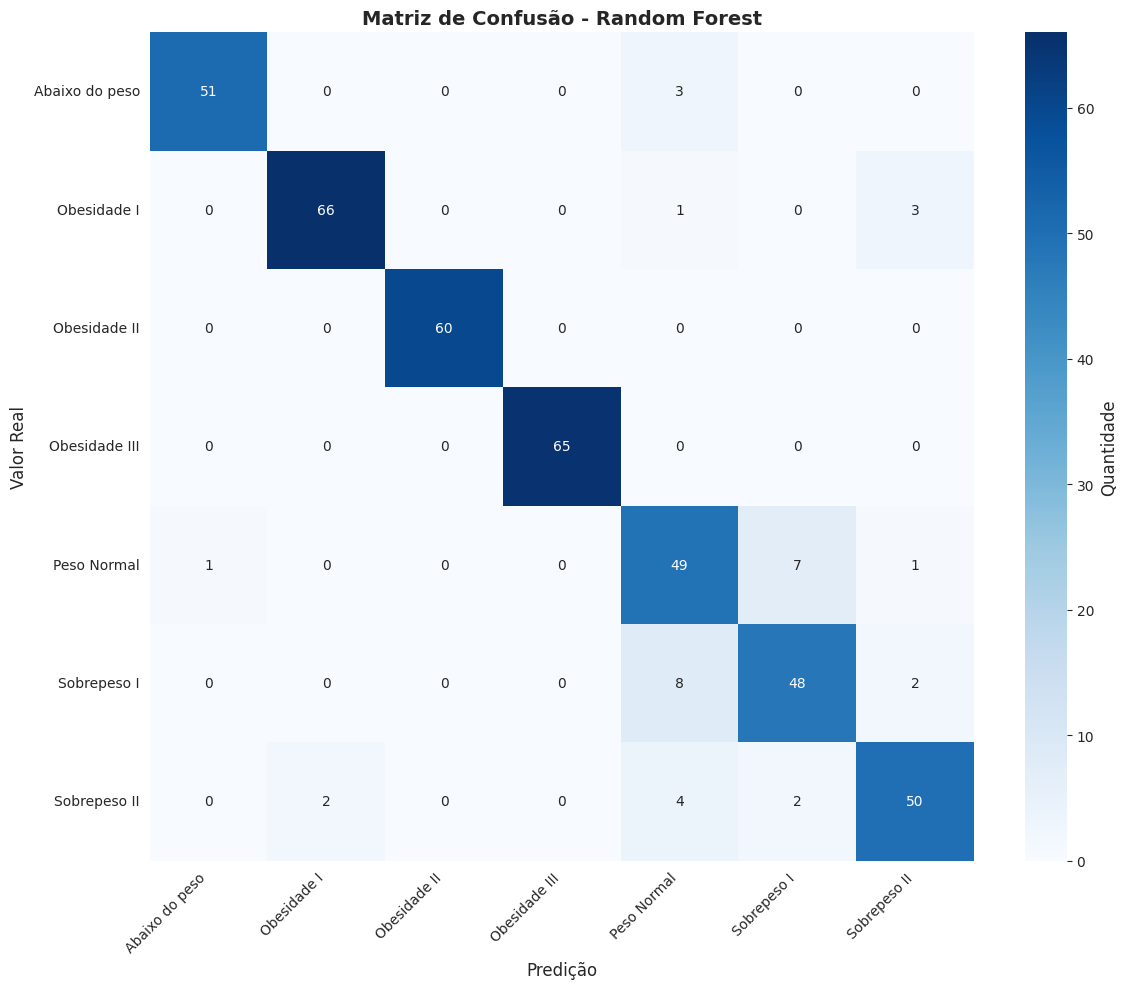


Análise por classe:
Abaixo do peso: 51/54 corretos (94.4%)
Obesidade I: 66/70 corretos (94.3%)
Obesidade II: 60/60 corretos (100.0%)
Obesidade III: 65/65 corretos (100.0%)
Peso Normal: 49/58 corretos (84.5%)
Sobrepeso I: 48/58 corretos (82.8%)
Sobrepeso II: 50/58 corretos (86.2%)

✅ Desempenho consistente entre classes (desvio: 0.07)
------------------------------------------------------------

--- Matriz de Confusão: SVM ---


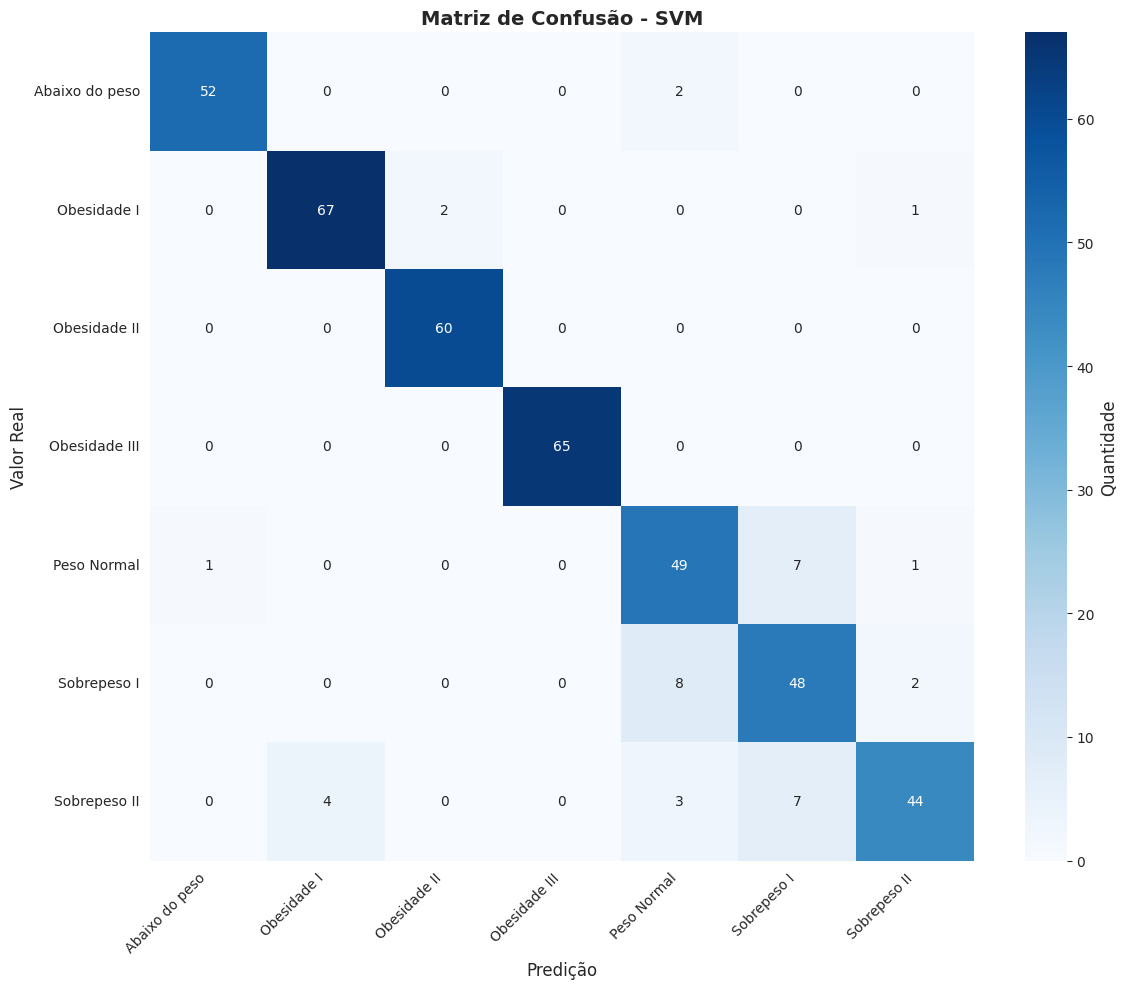


Análise por classe:
Abaixo do peso: 52/54 corretos (96.3%)
Obesidade I: 67/70 corretos (95.7%)
Obesidade II: 60/60 corretos (100.0%)
Obesidade III: 65/65 corretos (100.0%)
Peso Normal: 49/58 corretos (84.5%)
Sobrepeso I: 48/58 corretos (82.8%)
Sobrepeso II: 44/58 corretos (75.9%)

✅ Desempenho consistente entre classes (desvio: 0.09)
------------------------------------------------------------

--- Matriz de Confusão: XGBoost ---


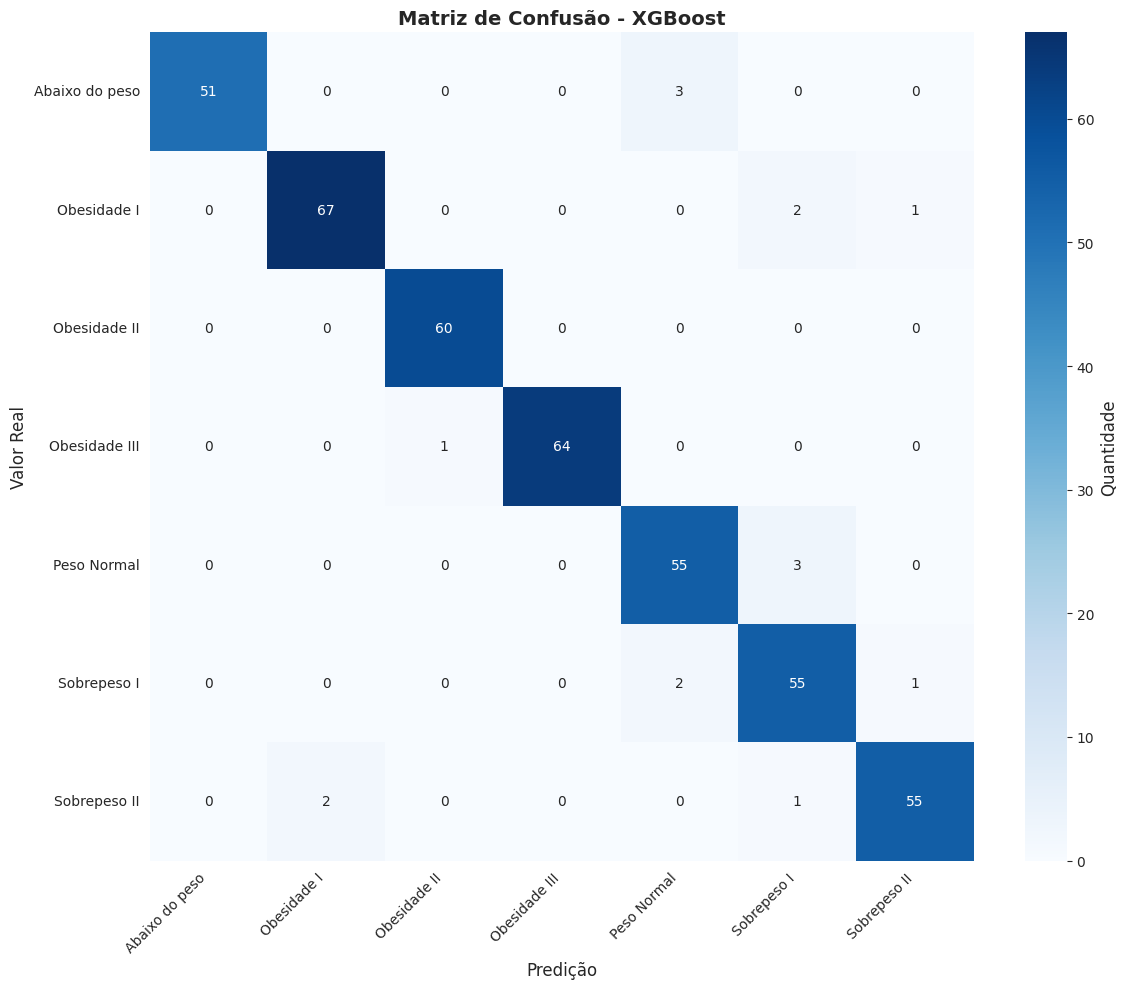


Análise por classe:
Abaixo do peso: 51/54 corretos (94.4%)
Obesidade I: 67/70 corretos (95.7%)
Obesidade II: 60/60 corretos (100.0%)
Obesidade III: 64/65 corretos (98.5%)
Peso Normal: 55/58 corretos (94.8%)
Sobrepeso I: 55/58 corretos (94.8%)
Sobrepeso II: 55/58 corretos (94.8%)

✅ Desempenho consistente entre classes (desvio: 0.02)
------------------------------------------------------------

--- Matriz de Confusão: CatBoost ---


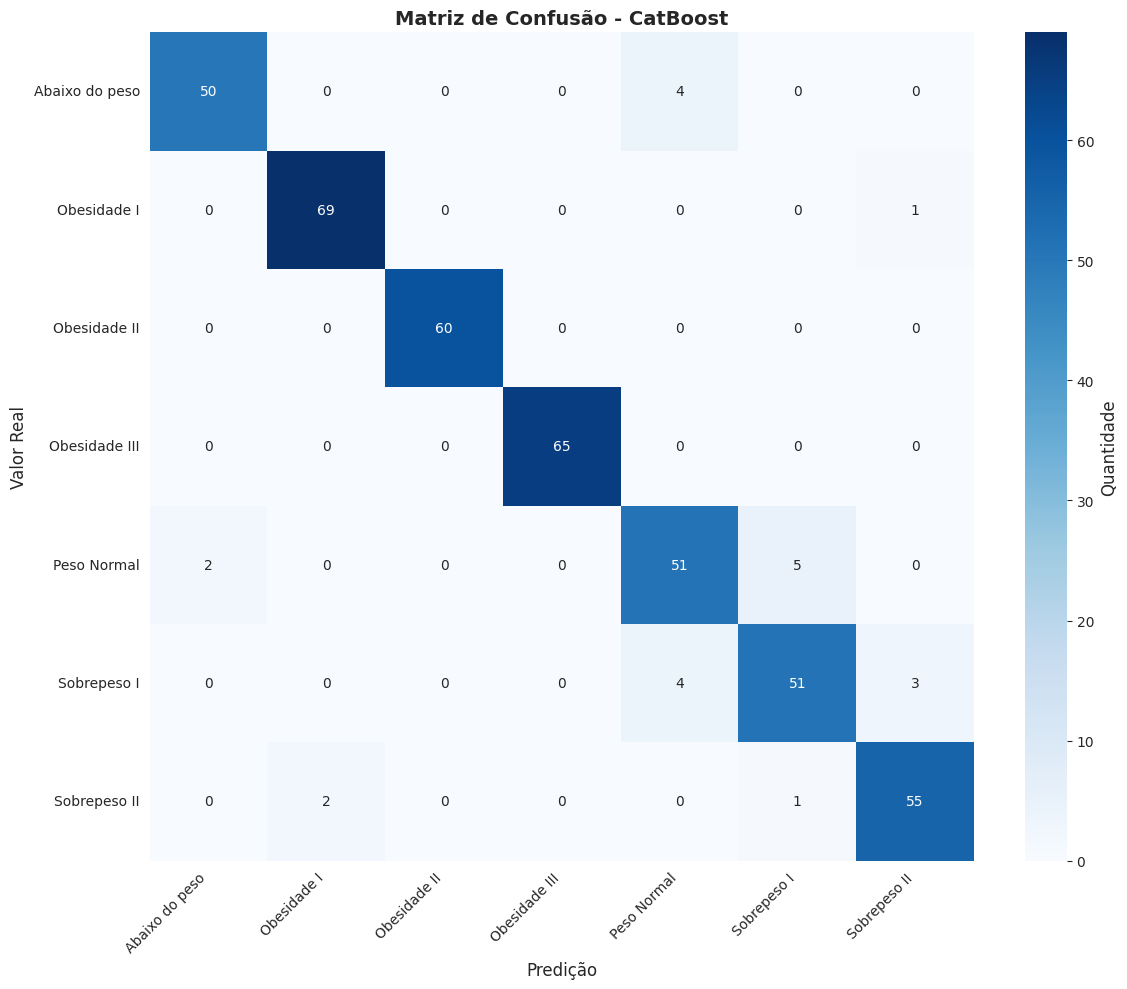


Análise por classe:
Abaixo do peso: 50/54 corretos (92.6%)
Obesidade I: 69/70 corretos (98.6%)
Obesidade II: 60/60 corretos (100.0%)
Obesidade III: 65/65 corretos (100.0%)
Peso Normal: 51/58 corretos (87.9%)
Sobrepeso I: 51/58 corretos (87.9%)
Sobrepeso II: 55/58 corretos (94.8%)

✅ Desempenho consistente entre classes (desvio: 0.05)
------------------------------------------------------------

--- Matriz de Confusão: LightGBM ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


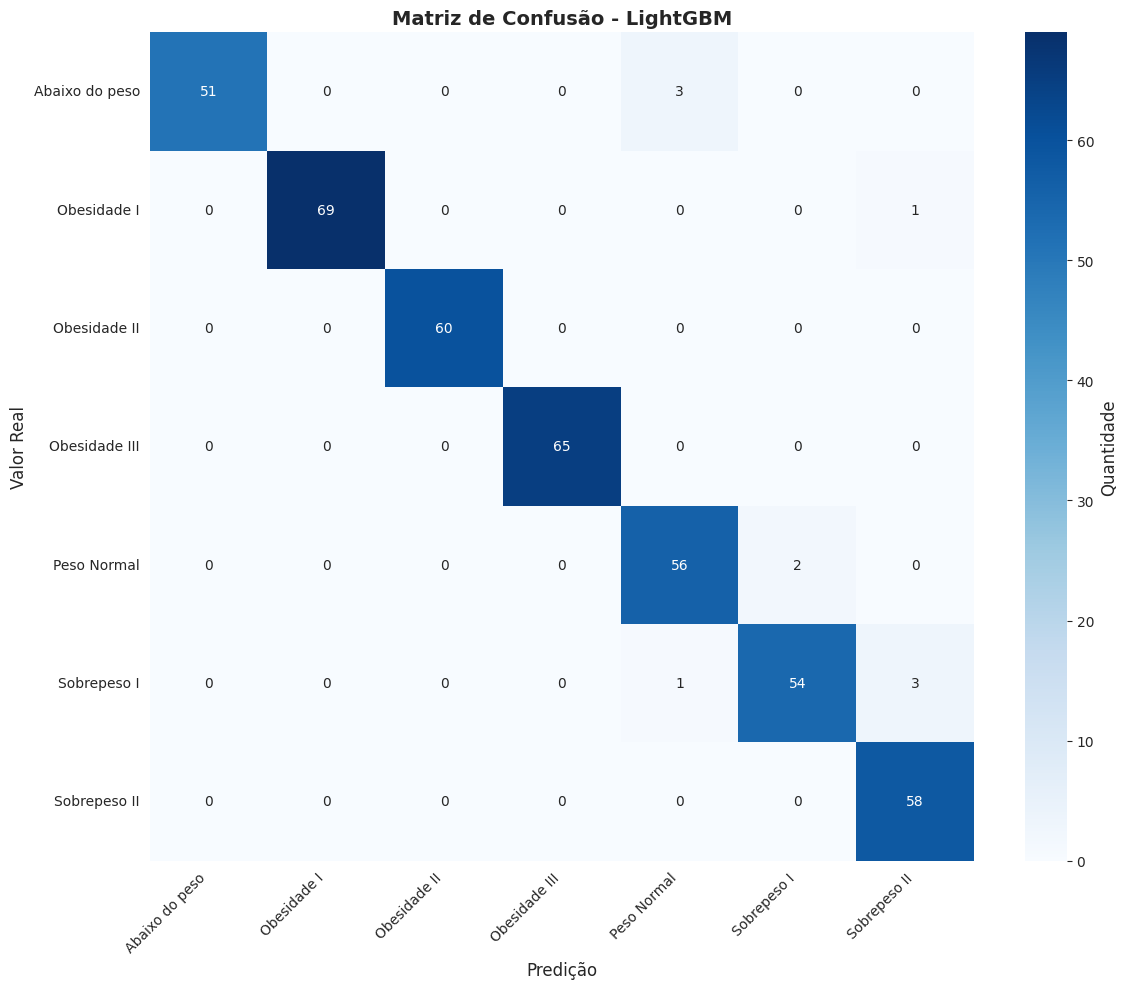


Análise por classe:
Abaixo do peso: 51/54 corretos (94.4%)
Obesidade I: 69/70 corretos (98.6%)
Obesidade II: 60/60 corretos (100.0%)
Obesidade III: 65/65 corretos (100.0%)
Peso Normal: 56/58 corretos (96.6%)
Sobrepeso I: 54/58 corretos (93.1%)
Sobrepeso II: 58/58 corretos (100.0%)

✅ Desempenho consistente entre classes (desvio: 0.03)
------------------------------------------------------------


In [43]:
from sklearn.metrics import confusion_matrix

# classes na ordem do LabelEncoder (0,1,2,3,4,5,6)
class_labels = le_y.classes_
labels = np.arange(len(class_labels))   # [0,1,2,3,4,5,6]

for name, pipeline in trained_pipelines.items():
    print(f"\n--- Matriz de Confusão: {name} ---")

    # Predições no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Matriz de confusão com ordem fixa de classes
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Gráfico
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_labels,
        yticklabels=class_labels,
        cbar_kws={'label': 'Quantidade'}
    )

    plt.title(f'Matriz de Confusão - {name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predição', fontsize=12)
    plt.ylabel('Valor Real', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Análise por classe com nomes
    print("\nAnálise por classe:")
    class_accuracies = []

    for i, class_name in enumerate(class_labels):
        correct = cm[i, i]
        total = cm[i].sum()
        accuracy_class = correct / total if total > 0 else 0
        class_accuracies.append(accuracy_class)

        print(f"{class_name}: {correct}/{total} corretos ({accuracy_class*100:.1f}%)")

        if accuracy_class < 0.7:
            print(f" ⚠️  {class_name} tem desempenho ruim - possível overfitting ou pouca amostra nessa classe")

    # Verificar se há desequilíbrio no desempenho entre classes
    std_accuracies = np.std(class_accuracies)

    if std_accuracies > 0.1:
        print(f"\n⚠️ Alto desvio padrão entre classes ({std_accuracies:.2f}) - desempenho inconsistente")
    else:
        print(f"\n✅ Desempenho consistente entre classes (desvio: {std_accuracies:.2f})")

    print("-"*60)



--- Regressao Logistica ---
Accuracy:  0.8842
Precision: 0.8845
Recall:    0.8842
F1-Score:  0.8822
✅ Métricas consistentes - modelo balanceado

--- Random Forest ---
Accuracy:  0.9196
Precision: 0.9226
Recall:    0.9196
F1-Score:  0.9206
✅ Métricas consistentes - modelo balanceado

--- SVM ---
Accuracy:  0.9102
Precision: 0.9126
Recall:    0.9102
F1-Score:  0.9100
✅ Métricas consistentes - modelo balanceado

--- XGBoost ---
Accuracy:  0.9622
Precision: 0.9632
Recall:    0.9622
F1-Score:  0.9624
✅ Métricas consistentes - modelo balanceado

--- CatBoost ---
Accuracy:  0.9480
Precision: 0.9481
Recall:    0.9480
F1-Score:  0.9480
✅ Métricas consistentes - modelo balanceado

--- LightGBM ---
Accuracy:  0.9764
Precision: 0.9771
Recall:    0.9764
F1-Score:  0.9764
✅ Métricas consistentes - modelo balanceado

RESUMO COMPARATIVO DE TODOS OS MODELOS:
             Modelo  Accuracy  Precision   Recall  F1-Score
Regressao Logistica  0.884161   0.884536 0.884161  0.882239
      Random Forest  0.91

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


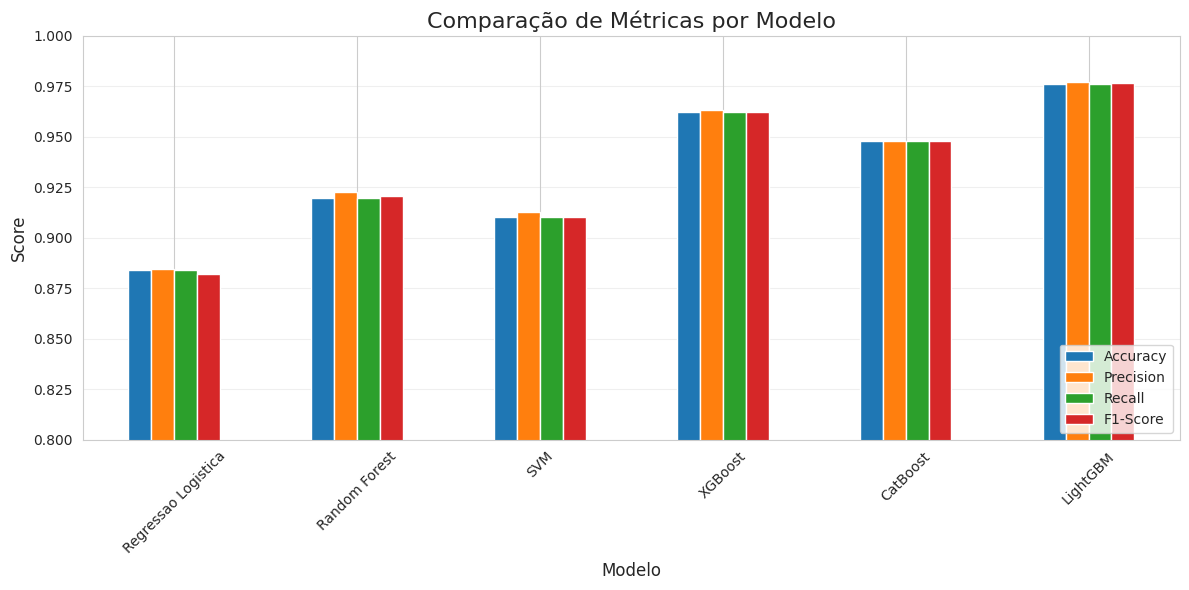


🏆 MELHOR MODELO (baseado no F1-Score): LightGBM


In [44]:
# Verificação de Overfitting: Comparar Múltiplas Métricas

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Criar um DataFrame para comparar métricas
results = []

for name, pipeline in trained_pipelines.items():
    # Predições no teste
    y_pred = pipeline.predict(X_test)

    # Calcular todas as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"\n--- {name} ---")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    # Verificar consistência entre métricas
    metrics = [accuracy, precision, recall, f1]
    std_metrics = np.std(metrics)

    if std_metrics < 0.05:
        print("✅ Métricas consistentes - modelo balanceado")
    else:
        print(f"⚠️ Métricas inconsistentes (desvio: {std_metrics:.4f}) - verificar desbalanceamento")

# Criar DataFrame para visualização
df_results = pd.DataFrame(results)
print("\n" + "="*60)
print("RESUMO COMPARATIVO DE TODOS OS MODELOS:")
print("="*60)
print(df_results.to_string(index=False))

# Visualização gráfica
df_results.set_index('Modelo').plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Comparação de Métricas por Modelo')
plt.ylabel('Score')
plt.xlabel('Modelo')
plt.legend(loc='lower right')
plt.ylim(0.8, 1.0)  # Ajustar conforme seus resultados
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Identificar o melhor modelo
best_model = df_results.loc[df_results['F1-Score'].idxmax(), 'Modelo']
print(f"\n🏆 MELHOR MODELO (baseado no F1-Score): {best_model}")

#### **Otimização do modelo Random Forest**

In [45]:
# Otimização do Random Forest com GridSearchCV

# Criar hiperparâmetros para teste de desempenho do modelo

from sklearn.model_selection import GridSearchCV

print("="*60)
print("OTIMIZAÇÃO DO RANDOM FOREST COM GRIDSEARCH")
print("="*60)

# Criar um novo pipeline para o Random Forest
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir o grid de hiperparâmetros para testar
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 15, 20, None],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__min_samples_leaf': [2, 5, 10],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

print("\nParâmetros a serem testados:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print(f"\nTotal de combinações: {50 * 4 * 3 * 3 * 2 * 2 = } 1440 combinações")
# print("Isso pode levar alguns minutos... ⏳\n")

OTIMIZAÇÃO DO RANDOM FOREST COM GRIDSEARCH

Parâmetros a serem testados:
  classifier__n_estimators: [50, 100, 200]
  classifier__max_depth: [10, 15, 20, None]
  classifier__min_samples_split: [5, 10, 15]
  classifier__min_samples_leaf: [2, 5, 10]
  classifier__max_features: ['sqrt', 'log2']
  classifier__class_weight: ['balanced', None]

Total de combinações: 50 * 4 * 3 * 3 * 2 * 2 = 7200 1440 combinações


In [46]:
# Criar o GridSearchCV

grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    scoring='f1_weighted',          # Métrica de avaliação
    n_jobs=-1,                      # Usar todos os processadores
    verbose=2,                      # Mostrar progresso
    return_train_score=True
)

# Treinar o GridSearch
print("Iniciando GridSearch...")
grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("RESULTADOS DO GRIDSEARCH")
print("="*60)

# Melhores parâmetros encontrados
print("\n🏆 MELHORES HIPERPARÂMETROS:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n📊 Melhor F1-Score (CV): {grid_search.best_score_:.4f}")

# Avaliar no conjunto de teste
best_rf_pipeline = grid_search.best_estimator_
y_pred_optimized = best_rf_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_optimized)
test_f1 = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"\n📈 DESEMPENHO NO CONJUNTO DE TESTE:")
print(f"  Acurácia: {test_accuracy:.4f}")
print(f"  F1-Score: {test_f1:.4f}")

# Comparar com o modelo original
original_rf = trained_pipelines['Random Forest']
y_pred_original = original_rf.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)
original_f1 = f1_score(y_test, y_pred_original, average='weighted')

print(f"\n🔄 COMPARAÇÃO COM MODELO ORIGINAL:")
print(f"  Acurácia Original:   {original_accuracy:.4f}")
print(f"  Acurácia Otimizada:  {test_accuracy:.4f}")
print(f"  Diferença: {(test_accuracy - original_accuracy) * 100:+.2f}%")
print(f"\n  F1-Score Original:   {original_f1:.4f}")
print(f"  F1-Score Otimizado:  {test_f1:.4f}")
print(f"  Diferença: {(test_f1 - original_f1) * 100:+.2f}%")

# Verificar overfitting no modelo otimizado
y_train_pred_opt = best_rf_pipeline.predict(X_train)
train_accuracy_opt = accuracy_score(y_train, y_train_pred_opt)

print(f"\n🔍 VERIFICAÇÃO DE OVERFITTING:")
print(f"  Acurácia no TREINO:  {train_accuracy_opt:.4f}")
print(f"  Acurácia no TESTE:   {test_accuracy:.4f}")
print(f"  Diferença: {(train_accuracy_opt - test_accuracy) * 100:.2f}%")

if (train_accuracy_opt - test_accuracy) < 0.05:
    print("  ✅ Overfitting resolvido!")
elif (train_accuracy_opt - test_accuracy) < 0.08:
    print("  ⚠️ Leve overfitting ainda presente")
else:
    print("  🚨 Overfitting significativo")

Iniciando GridSearch...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

RESULTADOS DO GRIDSEARCH

🏆 MELHORES HIPERPARÂMETROS:
  classifier__class_weight: balanced
  classifier__max_depth: 20
  classifier__max_features: sqrt
  classifier__min_samples_leaf: 2
  classifier__min_samples_split: 5
  classifier__n_estimators: 100

📊 Melhor F1-Score (CV): 0.9222

📈 DESEMPENHO NO CONJUNTO DE TESTE:
  Acurácia: 0.9125
  F1-Score: 0.9136

🔄 COMPARAÇÃO COM MODELO ORIGINAL:
  Acurácia Original:   0.9196
  Acurácia Otimizada:  0.9125
  Diferença: -0.71%

  F1-Score Original:   0.9206
  F1-Score Otimizado:  0.9136
  Diferença: -0.70%

🔍 VERIFICAÇÃO DE OVERFITTING:
  Acurácia no TREINO:  0.9882
  Acurácia no TESTE:   0.9125
  Diferença: 7.56%
  ⚠️ Leve overfitting ainda presente


In [47]:
# Relatório de classificação detalhado

print("\n📋 RELATÓRIO DE CLASSIFICAÇÃO DO MODELO OTIMIZADO:")
print(classification_report(y_test, y_pred_optimized))

# Análise por classe (especialmente Peso Normal)
print("\n🎯 ANÁLISE ESPECÍFICA POR CLASSE:")
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_optimized)
classes_mapping = dict(enumerate(le_y.classes_))

for i in range(len(cm)):
    correct = cm[i, i]
    total = cm[i].sum()
    accuracy_class = correct / total if total > 0 else 0
    class_name = classes_mapping.get(i, f'Classe {i}')

    # Comparar com o modelo original
    cm_original = confusion_matrix(y_test, y_pred_original)
    correct_original = cm_original[i, i]
    accuracy_original = correct_original / total if total > 0 else 0

    diff = (accuracy_class - accuracy_original) * 100
    symbol = "📈" if diff > 0 else "📉" if diff < 0 else "➡️"

    print(f"{class_name}:")
    print(f"  Original:   {accuracy_original * 100:.1f}%")
    print(f"  Otimizado:  {accuracy_class * 100:.1f}%")
    print(f"  {symbol} Mudança: {diff:+.1f}%")

# Salvar o melhor modelo
model_filename = "random_forest_optimized_model.pkl"
joblib.dump(best_rf_pipeline, model_filename)
print(f"\n💾 Modelo otimizado salvo como '{model_filename}'")

# Atualizar o dicionário de pipelines
trained_pipelines['Random Forest Otimizado'] = best_rf_pipeline
print("✅ Pipeline otimizado adicionado ao dicionário 'trained_pipelines'")

print("\n" + "="*60)

# Top 5 melhores combinações
print("\n📊 TOP 5 MELHORES COMBINAÇÕES DE HIPERPARÂMETROS:")
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')

for idx, row in results_df.head(5).iterrows():
    print(f"\n#{int(row['rank_test_score'])} - F1-Score: {row['mean_test_score']:.4f}")
    print(f"   Parâmetros: {row['params']}")

print("\n" + "="*60)


📋 RELATÓRIO DE CLASSIFICAÇÃO DO MODELO OTIMIZADO:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.96      0.91      0.93        70
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        65
           4       0.72      0.84      0.78        58
           5       0.87      0.83      0.85        58
           6       0.91      0.83      0.86        58

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.92      0.91      0.91       423


🎯 ANÁLISE ESPECÍFICA POR CLASSE:
Abaixo do peso:
  Original:   94.4%
  Otimizado:  96.3%
  📈 Mudança: +1.9%
Obesidade I:
  Original:   94.3%
  Otimizado:  91.4%
  📉 Mudança: -2.9%
Obesidade II:
  Original:   100.0%
  Otimizado:  100.0%
  ➡️ Mudança: +0.0%
Obesidade III:
  Original:   100.0%
  Otimizado:  100.0%
  ➡️ Mudança: +0.0%
Peso Normal:
  Ori

#### **Incluindo Análise de Curva ROC para os modelos salvos**

In [48]:
# ANÁLISE COMPLETA: CURVA ROC PARA TODOS OS MODELOS

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

print("="*60)
print("ANÁLISE DE CURVA ROC - TODOS OS MODELOS")
print("="*60)

# Binarizar as classes para ROC multiclasse
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Dicionário para armazenar AUC scores
auc_scores = {}

# Para cada modelo
for name, pipeline in trained_pipelines.items():
    print(f"\n--- {name} ---")

    # Obter probabilidades preditas
    if hasattr(pipeline, 'predict_proba'):
        y_score = pipeline.predict_proba(X_test)
    else:
        print(f"⚠️ {name} não suporta predict_proba - pulando ROC")
        continue

    # Calcular ROC e AUC para cada classe (One-vs-Rest)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular micro-average ROC curve e AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Calcular macro-average ROC curve e AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Armazenar AUC macro para comparação
    auc_scores[name] = roc_auc["macro"]

    print(f"AUC Macro-Average: {roc_auc['macro']:.4f}")
    print(f"AUC Micro-Average: {roc_auc['micro']:.4f}")

# Ranking por AUC
print("\n" + "="*60)
print("🏆 RANKING POR AUC (Macro-Average):")
print("="*60)

auc_ranking = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)
for rank, (model, score) in enumerate(auc_ranking, 1):
    emoji = "🥇" if rank == 1 else "🥈" if rank == 2 else "🥉" if rank == 3 else "  "
    print(f"{emoji} {rank}º. {model}: {score:.4f}")

print("\n" + "="*60)

ANÁLISE DE CURVA ROC - TODOS OS MODELOS

--- Regressao Logistica ---
AUC Macro-Average: 0.9863
AUC Micro-Average: 0.9899

--- Random Forest ---
AUC Macro-Average: 0.9920
AUC Micro-Average: 0.9953

--- SVM ---
AUC Macro-Average: 0.9929
AUC Micro-Average: 0.9956

--- XGBoost ---
AUC Macro-Average: 0.9974
AUC Micro-Average: 0.9970

--- CatBoost ---
AUC Macro-Average: 0.9960
AUC Micro-Average: 0.9970

--- LightGBM ---
AUC Macro-Average: 0.9975
AUC Micro-Average: 0.9974

--- Random Forest Otimizado ---
AUC Macro-Average: 0.9913
AUC Micro-Average: 0.9944

🏆 RANKING POR AUC (Macro-Average):
🥇 1º. LightGBM: 0.9975
🥈 2º. XGBoost: 0.9974
🥉 3º. CatBoost: 0.9960
   4º. SVM: 0.9929
   5º. Random Forest: 0.9920
   6º. Random Forest Otimizado: 0.9913
   7º. Regressao Logistica: 0.9863



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Gerando gráficos de Curva ROC...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


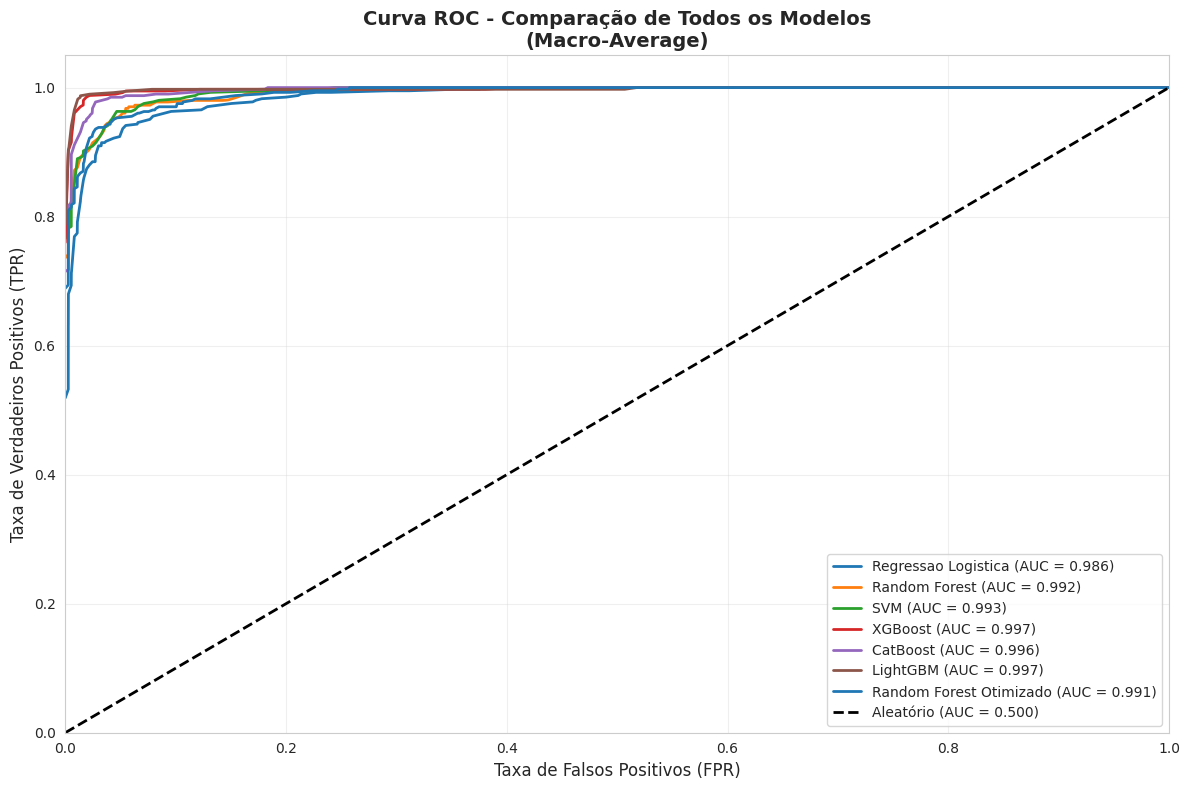

✅ Gráfico de comparação ROC gerado!


In [49]:
# GRÁFICO: CURVA ROC COMPARATIVA (Macro-Average)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

print("Gerando gráficos de Curva ROC...")

# Binarizar y_test
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Cores para cada modelo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# GRÁFICO 1: Todas as curvas ROC (Macro-Average) em um único gráfico
plt.figure(figsize=(12, 8))

for idx, (name, pipeline) in enumerate(trained_pipelines.items()):
    if not hasattr(pipeline, 'predict_proba'):
        continue

    # Obter probabilidades
    y_score = pipeline.predict_proba(X_test)

    # Calcular ROC para cada classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr_macro = all_fpr
    tpr_macro = mean_tpr
    auc_macro = auc(fpr_macro, tpr_macro)

    # Plotar
    plt.plot(fpr_macro, tpr_macro,
             color=colors[idx % len(colors)],
             lw=2,
             label=f'{name} (AUC = {auc_macro:.3f})')

# Linha diagonal (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatório (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curva ROC - Comparação de Todos os Modelos\n(Macro-Average)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Gráfico de comparação ROC gerado!")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


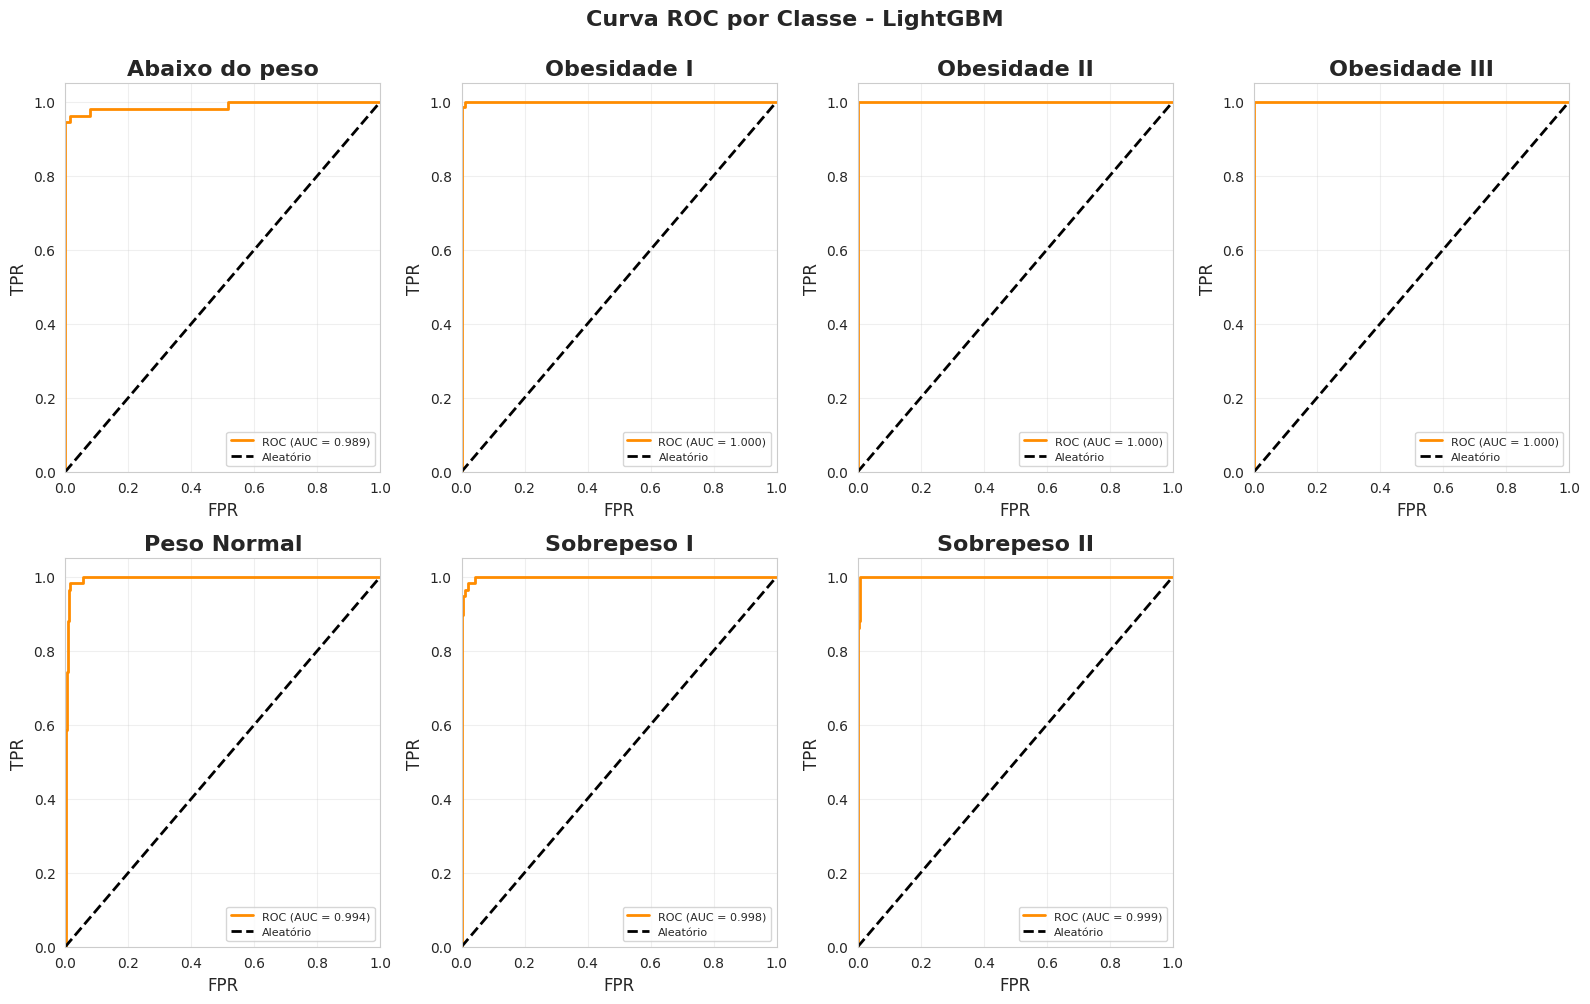

✅ Gráfico ROC por classe gerado!


In [50]:
# GRÁFICO 2: ROC por classe individual (LightGBM)

# Mapeamento das classes
classes_mapping = dict(enumerate(le_y.classes_))

# Modelo LightGBM
best_model = trained_pipelines['LightGBM']
y_score = best_model.predict_proba(X_test)

# Calcular ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.ravel()

for i in range(n_classes):
    ax = axes[i]
    class_name = classes_mapping.get(i, f'Classe {i}')

    ax.plot(fpr[i], tpr[i], color='darkorange', lw=2,
            label=f'ROC (AUC = {roc_auc[i]:.3f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Aleatório')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title(f'{class_name}', fontweight='bold')
    ax.legend(loc="lower right", fontsize=8)
    ax.grid(True, alpha=0.3)

# Remover o último subplot (temos 7 classes, sobra 1 espaço)
fig.delaxes(axes[7])

plt.suptitle('Curva ROC por Classe - LightGBM', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✅ Gráfico ROC por classe gerado!")

In [51]:
# TABELA FINAL: F1-Score vs AUC

import pandas as pd

print("\n" + "="*60)
print("📊 COMPARAÇÃO FINAL: F1-SCORE vs AUC")
print("="*60)

results_final = []

for name, pipeline in trained_pipelines.items():
    if not hasattr(pipeline, 'predict_proba'):
        continue

    # F1-Score
    y_pred = pipeline.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # AUC
    y_score = pipeline.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average AUC
    auc_macro = np.mean([roc_auc[i] for i in range(n_classes)])

    results_final.append({
        'Modelo': name,
        'F1-Score': f1,
        'AUC (Macro)': auc_macro
    })

df_final = pd.DataFrame(results_final)
df_final = df_final.sort_values('AUC (Macro)', ascending=False)

print("\n" + df_final.to_string(index=False))

# Melhor modelo
best_model_name = df_final.iloc[0]['Modelo']
best_f1 = df_final.iloc[0]['F1-Score']
best_auc = df_final.iloc[0]['AUC (Macro)']

print("\n" + "="*60)
print(f"🏆 MELHOR MODELO: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print(f"   AUC: {best_auc:.4f}")
print("="*60)


📊 COMPARAÇÃO FINAL: F1-SCORE vs AUC

                 Modelo  F1-Score  AUC (Macro)
               LightGBM  0.976403     0.997129
                XGBoost  0.962409     0.997010
               CatBoost  0.947971     0.995767
                    SVM  0.910035     0.992474
          Random Forest  0.920626     0.991920
Random Forest Otimizado  0.913645     0.990996
    Regressao Logistica  0.882239     0.985616

🏆 MELHOR MODELO: LightGBM
   F1-Score: 0.9764
   AUC: 0.9971


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


#### **Teste Rápido: Melhor solução para subir para produção**

In [52]:
# TESTE RÁPIDO: Comparar as 4 estratégias

from sklearn.ensemble import VotingClassifier
import time

print("="*60)
print("COMPARAÇÃO: LightGBM vs Voting vs Voting Diverso")
print("="*60)

# 1. LightGBM sozinho (baseline)
lgbm_solo = trained_pipelines['LightGBM']
y_pred_solo = lgbm_solo.predict(X_test)
f1_solo = f1_score(y_test, y_pred_solo, average='weighted')

start = time.time()
_ = lgbm_solo.predict(X_test)
time_solo = time.time() - start

print(f"\n1️⃣ LightGBM SOZINHO:")
print(f"   F1-Score: {f1_solo:.4f}")
print(f"   Tempo: {time_solo:.4f}s")

# 2. Voting Top 2 (LGBM e XGB)
voting_top2 = VotingClassifier(
    estimators=[
        ('lgbm', trained_pipelines['LightGBM'].named_steps['classifier']),
        ('xgb', trained_pipelines['XGBoost'].named_steps['classifier'])
    ],
    voting='soft'
)

pipeline_voting_top2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_top2)
])

pipeline_voting_top2.fit(X_train, y_train)
y_pred_top2 = pipeline_voting_top2.predict(X_test)
f1_top2 = f1_score(y_test, y_pred_top2, average='weighted')

start = time.time()
_ = pipeline_voting_top2.predict(X_test)
time_top2 = time.time() - start

print(f"\n2️⃣ VOTING TOP 2 (LGBM e XGB):")
print(f"   F1-Score: {f1_top2:.4f}")
print(f"   Ganho: {(f1_top2 - f1_solo)*100:+.2f}%")
print(f"   Tempo: {time_top2:.4f}s ({time_top2/time_solo:.1f}x mais lento)")

# 3. Voting Top 3 (boosting similar)
voting_top3 = VotingClassifier(
    estimators=[
        ('lgbm', trained_pipelines['LightGBM'].named_steps['classifier']),
        ('xgb', trained_pipelines['XGBoost'].named_steps['classifier']),
        ('cat', trained_pipelines['CatBoost'].named_steps['classifier'])
    ],
    voting='soft'
)

pipeline_voting_top3 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_top3)
])

pipeline_voting_top3.fit(X_train, y_train)
y_pred_top3 = pipeline_voting_top3.predict(X_test)
f1_top3 = f1_score(y_test, y_pred_top3, average='weighted')

start = time.time()
_ = pipeline_voting_top3.predict(X_test)
time_top3 = time.time() - start

print(f"\n3️⃣ VOTING TOP 3 (Boosting Similares):")
print(f"   F1-Score: {f1_top3:.4f}")
print(f"   Ganho: {(f1_top3 - f1_solo)*100:+.2f}%")
print(f"   Tempo: {time_top3:.4f}s ({time_top3/time_solo:.1f}x mais lento)")

# 4. Voting Diverso (boosting + linear + margens)
voting_diverso = VotingClassifier(
    estimators=[
        ('lgbm', trained_pipelines['LightGBM'].named_steps['classifier']),
        ('svm', trained_pipelines['SVM'].named_steps['classifier']),
        ('lr', trained_pipelines['Regressao Logistica'].named_steps['classifier'])
    ],
    voting='soft',
    weights=[3, 1, 1]  # Dar mais peso ao melhor
)

pipeline_voting_diverso = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_diverso)
])

pipeline_voting_diverso.fit(X_train, y_train)
y_pred_diverso = pipeline_voting_diverso.predict(X_test)
f1_diverso = f1_score(y_test, y_pred_diverso, average='weighted')

start = time.time()
_ = pipeline_voting_diverso.predict(X_test)
time_diverso = time.time() - start

print(f"\n VOTING DIVERSO (Boosting + Linear + SVM):")
print(f"   F1-Score: {f1_diverso:.4f}")
print(f"   Ganho: {(f1_diverso - f1_solo)*100:+.2f}%")
print(f"   Tempo: {time_diverso:.4f}s ({time_diverso/time_solo:.1f}x mais lento)")

# Comparação final
print("\n" + "="*60)
print("📊 RESUMO COMPARATIVO:")
print("="*60)

results_comparison = [
    {'Estratégia': 'LightGBM Solo', 'F1-Score': f1_solo, 'Tempo (s)': time_solo, 'Complexidade': 'Baixa'},
    {'Estratégia': 'Voting Top 2', 'F1-Score': f1_top2, 'Tempo (s)': time_top2, 'Complexidade': 'Alta'},
    {'Estratégia': 'Voting Top 3', 'F1-Score': f1_top3, 'Tempo (s)': time_top3, 'Complexidade': 'Alta'},
    {'Estratégia': 'Voting Diverso', 'F1-Score': f1_diverso, 'Tempo (s)': time_diverso, 'Complexidade': 'Alta'}
]

df_comparison = pd.DataFrame(results_comparison)
df_comparison['Ganho (%)'] = (df_comparison['F1-Score'] - f1_solo) * 100
df_comparison = df_comparison.sort_values('F1-Score', ascending=False)

print(df_comparison.to_string(index=False))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


COMPARAÇÃO: LightGBM vs Voting vs Voting Diverso

1️⃣ LightGBM SOZINHO:
   F1-Score: 0.9764
   Tempo: 0.0523s


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:52:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



2️⃣ VOTING TOP 2 (LGBM e XGB):
   F1-Score: 0.9764
   Ganho: +0.00%
   Tempo: 0.0661s (1.3x mais lento)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:52:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



3️⃣ VOTING TOP 3 (Boosting Similares):
   F1-Score: 0.9764
   Ganho: +0.00%
   Tempo: 0.0819s (1.6x mais lento)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



 VOTING DIVERSO (Boosting + Linear + SVM):
   F1-Score: 0.9741
   Ganho: -0.23%
   Tempo: 0.1007s (1.9x mais lento)

📊 RESUMO COMPARATIVO:
    Estratégia  F1-Score  Tempo (s) Complexidade  Ganho (%)
  Voting Top 2  0.976410   0.066129         Alta   0.000666
  Voting Top 3  0.976410   0.081913         Alta   0.000666
 LightGBM Solo  0.976403   0.052336        Baixa   0.000000
Voting Diverso  0.974085   0.100700         Alta  -0.231836


#### **Modelo Escolhido**

In [53]:
# 10. Voting Ensemble Top 2 foi o modelo escolhido

best_model = voting_top2

# Salvar o modelo treinado
model_filename = f"best_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Modelo salvo como '{model_filename}'")
print("="*50 + "\n")

# Salvar o pipeline em memória
trained_pipelines[name] = best_model

Modelo salvo como 'best_model.pkl'

